
# Project 2018 - Fundamentals Of Data Analysis

### A Notebook by : Marco Men

### Last Commit by : 14 - 12 - 2018

## Introduction



I was asked to investigate and explain box plots and their uses, by providing the following:


* Summarising the history of the box plots and situations in which they are used ;
* Demonstrating the use of the box plot using data of my choosing;
* Explain any relevant terminology such as the terms quartile and percentile;
* Compare the box plot alternatives.

I will be using matplotlib.pyplot ( a Python library package for plotting and visual analysis ) to create boxplots in this notebook.

## History of Box Plots

According to [TowardsDataScience.com](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) :


Boxplots are typically used to display the distribution of data based on a five number summary ( **“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”** ). It can tell you about your outliers and what their values are. It can also tell you *if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed*. Therefore, a boxplot is a graph that gives you a good indication of how the values in the data are spread out. In comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.

I will be using 'Tips' from [seaborn.org](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to demonstrate the boxplots. This dataset is quite good to make this boxplot demonstration, as it provides 7 different variables.
Usually a boxplot is used when a **discrete variable** ( Female or Male ) is plotted against a **continuous variable** .

In [2]:
# Libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
# Load the DS
# Adapted from : 'https://seaborn.pydata.org/introduction.html'

tips = sns.load_dataset("tips")

tips
tips.mean()


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

The information above gives us the mean for the numerical variables in the dataset. That is 'total_bill', 'tip' and 'size'. The other 4 variables are categorical variables.

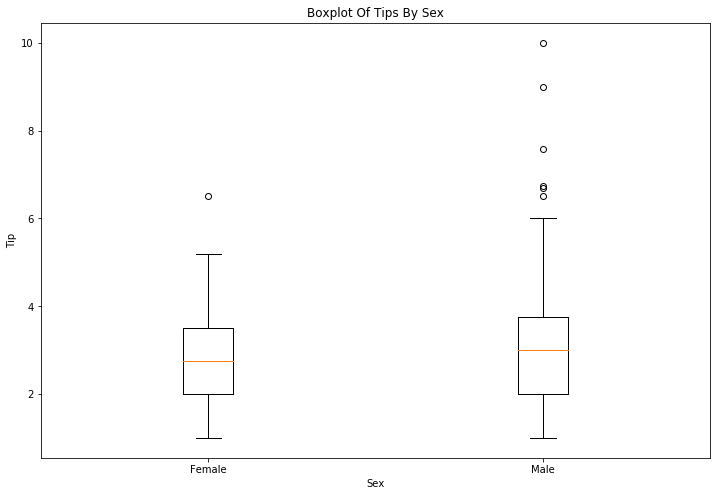

In [4]:
boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['sex']== 'Female']['tip'],
    tips[tips['sex']== 'Male']['tip']],
 
    labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Sex')

boxplot.show()

##  Analysis Of Data By Gender

In this example it is evident that men are better at tipping after having a meal. Perhaps, due to lower expectations with regards to service, or the fact that men are more likely to go out more often. Even, if a couple goes out for dinner, there is a bigger chance that men will pay for the dinner.
There are also more outliers ( 6 outliers ) on the male boxplot ( male dinners that tip outside the \$6 mark - maximum tip for male dinners ). The furthest male outlier reaches a tip payment level of \$10.
For the female boxplot, the maximum tip is in the mark of \$5.50, with only 1 outlier paying \$6.50.

With this dataset, I could further investigate which day of the week  between Thursday, Friday, Saturday and Sunday ( **discrete variable** ) the people are more likely to tip better or worse ( **continuous variable** ). Or, which are the biggest tippers between smokers and non-smokers ( **discrete** ).
All of these can be done using boxplots ( also referred to as *whisker plots* )

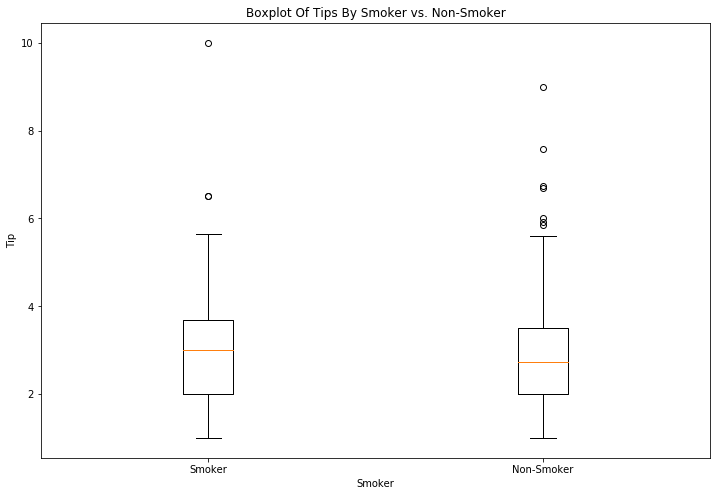

In [5]:
# Smokers vs. Non-smokers

boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['smoker']== 'Yes']['tip'],
    tips[tips['smoker']== 'No']['tip']],
 
    labels=['Smoker', 'Non-Smoker'])

axes1.set_xlabel('Smoker')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Smoker vs. Non-Smoker')

boxplot.show()

##  Analysis of 'Smoker vs. Non-Smoker Tips' 

Through visualising the boxplots above, the conclusion that there is little difference between the 2 groups in terms of providing tips. There are more non-smoker outliers,i.e.more non-smoker customers giving tips outside the maximum value of \$5.85 ( approx. ). But the customer that gives the highest tip ( \$10 ) is a smoker. This pushes the mean line in the boxplot closer to the 3th quartile.

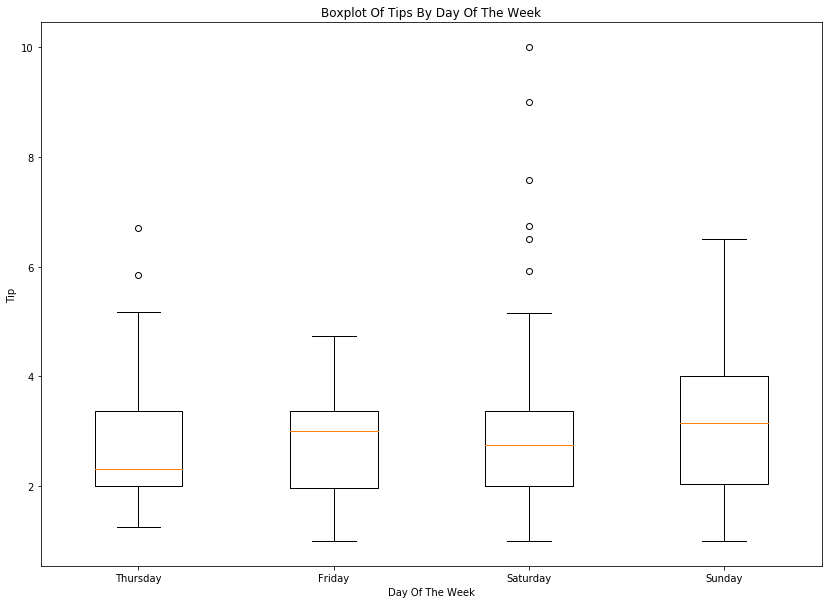

In [11]:
# Days of the week

boxplot = plt.figure(figsize=(14,10))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['day']== 'Thur']['tip'],
    tips[tips['day']== 'Fri']['tip'],
     tips[tips['day']=='Sat']['tip'],
     tips[tips['day']=='Sun']['tip']],
    
 
    labels=['Thursday', 'Friday', 'Saturday', 'Sunday'])

axes1.set_xlabel('Day Of The Week')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Day Of The Week')

boxplot.show()

## Day Of The Week Analysis

The day of the week with highest tips is Sunday,perhaps due to the gratitude of having someone else cook for them after a night out or maybe after mass service.
Saturday is the day with the highest number of outliers and the furthest outlying points. This simply means that there is a higher likelihood of waiters/waitresses of getting more and higher tips on Saturday than any of the other 4 days. 
I will be performing value counts to see which day is the busiest, since the boxplots above do not give that information.

In [14]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Saturday and Sunday are the busiest days in this restaurant. But Thursday is busy too.
If I had to guess, Thursday is most likely payday and lunchtime on Thursday is the busiest working day of the week in the restaurant, as most people will take their lunch break at the restaurant.

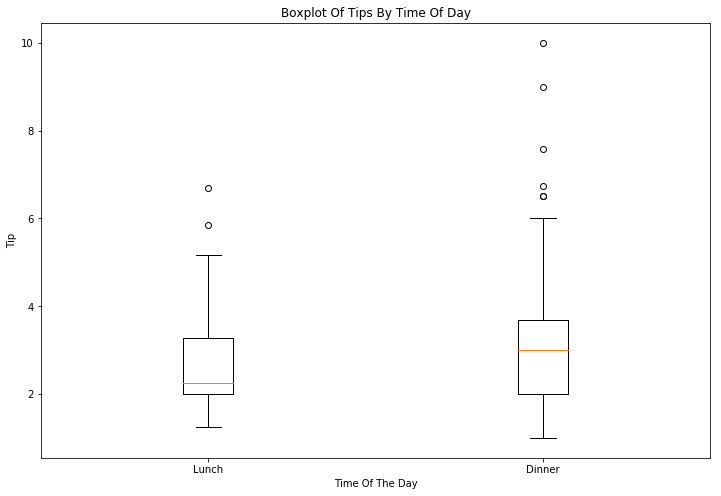

In [6]:
# Time(Dinner or lunch)

boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['time']== 'Lunch']['tip'],
    tips[tips['time']== 'Dinner']['tip']],
 
    labels=['Lunch', 'Dinner'])

axes1.set_xlabel('Time Of The Day')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Time Of Day')

boxplot.show()

Analysing the boxplot above the most frequent and highest tips occur during dinnertime.
All this information can be extrapolated by visualiusation of boxplots, which provides immediate comparable information

## Relevant Terms Used


A box plot consists of box and "whiskers". The area inside the box is the goes from the $25^{th}$ percentile to the $75^{th}$ percentile of the data. This region is known as the ***inter-quartile range ( IQR )***. There is a line inside the box indicating the $50^{th}$ percentile ( also known as the ***median*** ).
The whiskers start from the edge of the box on both sides and they extend to the furthest data point that is within 1.5 times the **IQR**. If there are any data points that are past the end of the whiskers, they are considered *outliers* and displayed with dots.

In the box plot graphs above, I can see in all of them what is known as the *floor effect* of 0. This means that there is no value less than 0 when it comes to analysing tips given in a restaurant ( unless a customer does not pay their bill, which will not be accounted for in the dataset ).

There are datasets that are represented by *ceiling effect*. Let us imagine a test score for 2 different years, we might get a ceiling effect of 100 in both years, which would mean that there was no mark higher than 100 given in either year, but the lowest value would most likely differ in both years

Definition of terms ( as per [StatisticsHowTo](https://www.statisticshowto.datasciencecentral.com/what-are-quartiles/) and [StatTrek](https://stattrek.com/statistics/dictionary.aspx?definition=percentile), such as:

* **Quartile** - **Quartiles** in statistics are values that divide your data into quarters. They divide your data into four segments according to where the numbers fall on the number line. The four quarters that divide a data set into quartiles are:
    The lowest 25% of numbers.
    The next lowest 25% of numbers (up to the median).
    The second highest 25% of numbers (above the median).
    The highest 25% of numbers.

* **Percentile** -Assume that the elements in a data set are rank ordered from the smallest to the largest. The values that divide a rank-ordered set of elements into 100 equal parts are called percentiles

An element having a percentile rank of Pi would have a greater value than i percent of all the elements in the set. Thus, the observation at the $50^{th}$ percentile would be denoted P50, and it would be greater than 50 percent of the observations in the set. An observation at the $50^{th}$ percentile would correspond to the median value in the set.

## Alternative Plots To Box Plots

A box plot ( or box-and-whisker plot ) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable ( [seaborn.org](https://seaborn.pydata.org/generated/seaborn.boxplot.html) )
As box plots are used to measure and visualise group density, the best alternative to box plots would be histogram with density plot. 
To demonstrate this, I will plot an histogram with density plot on top of a box plot to compare them.

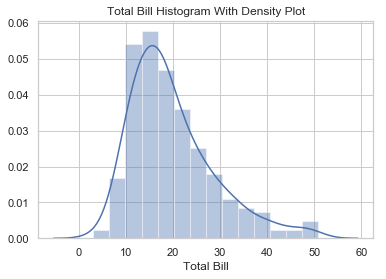

In [11]:
# Histogram with KDE

ax = sns.distplot(tips['total_bill'])
ax.set_title("Total Bill Histogram With Density Plot")
ax.set_xlabel("Total Bill")
plt.show()

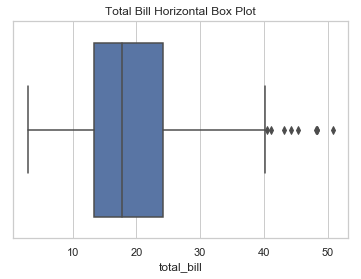

In [6]:

# Box Plot from Seaborn.org

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])
ax.set_title("Total Bill Horizontal Box Plot")
plt.show()

We can see that the mean falls around 18/19. The IQR area goes from 15 to 25 in the box plot graph.
In the histogram with the KDE is from the middle of the $3^{rd}$ bin until the middle of the $7^{th}$ bin . The ouliers are placed between 41 until 53 ( more or less ).

## Conclusion

From this notebook we can conclude that boxplots are very helpful to easily display statistic results regarding symmetry, skeweness and dispersion of data, but also any outliers that may exist are displayed . The alternative method and of my personal preference is the histogram with the density plot, which displays the same type of information, except the outliers which may be difficult to identify. The  continuity of the density line until the end of the histogram will give the illusion to the viewer of normality distribution without any out of range data points. 

## Literature Review & References

'Pandas For Everyone' - Daniel Y. Chen

'R Graphics Cookook' - Winston Chang

'Statistics In A Nutshell' - Sarah Boslaugh & Paul Andrew Watters

[seaborn.org](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

[StatisticsHowTo](https://www.statisticshowto.datasciencecentral.com/what-are-quartiles/) 

[StatTrek](https://stattrek.com/statistics/dictionary.aspx?definition=percentile)

[TowardsScience](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

[LumenLearning](https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/interquartile-range-and-boxplots-2-of-3/)
